# Multiple Linear Regression

#### Task: Predict the petrol consumption of a country given various factors such as tax, distance of highways and population with driving license
#### Input: Tax, distance of highways, average income and poplation with driving license
#### Output: Expected petrol consumption 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
df = pd.read_csv("w1_petrol_consumption.csv")

In [6]:
df.head(5)

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [8]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Petrol_tax,48.0,7.67,0.95,5.00,7.00,7.50,8.12,10.00
Average_income,48.0,4241.83,573.62,3063.00,3739.00,4298.00,4578.75,5342.00
Paved_Highways,48.0,5565.42,3491.51,431.00,3110.25,4735.50,7156.00,17782.00
Population_Driver_licence(%),48.0,0.57,0.06,0.45,0.53,0.56,0.60,0.72
Petrol_Consumption,48.0,576.77,111.89,344.00,509.50,568.50,632.75,968.00


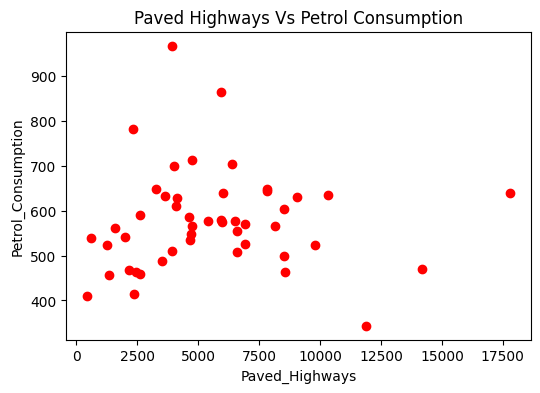

In [10]:
plt.figure(figsize=(6,4))
plt.plot(df['Paved_Highways'], df['Petrol_Consumption'], 'ro')
plt.title('Paved Highways Vs Petrol Consumption')
plt.xlabel('Paved_Highways')
plt.ylabel('Petrol_Consumption')

plt.show()

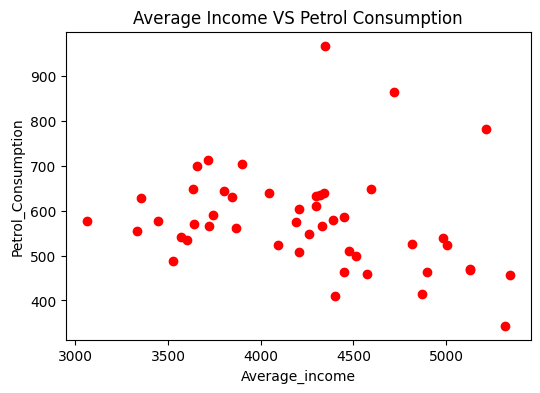

In [11]:
plt.figure(figsize=(6,4))
plt.plot(df['Average_income'], df['Petrol_Consumption'], 'ro')
plt.title('Average Income VS Petrol Consumption')
plt.xlabel('Average_income')
plt.ylabel('Petrol_Consumption')

plt.show()

### Train the model

In [12]:
X = df[['Petrol_tax','Average_income','Paved_Highways','Population_Driver_licence(%)']]
Y = df['Petrol_Consumption']

In [37]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size=0.3, random_state=42)

In [38]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [39]:
regressor.intercept_

np.float64(513.1398382048226)

In [40]:
regressor.coef_

array([-3.99336011e+01, -4.53815410e-02, -4.95597538e-03,  1.03711642e+03])

### Make Predictions

In [41]:
y_pred = regressor.predict(x_test)

In [42]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results)

    Actual   Predicted
27     631  594.684737
40     587  657.946263
26     577  578.777962
43     591  577.565848
24     460  524.600507
37     704  632.859084
12     525  575.961662
19     640  649.045363
4      410  556.092937
25     566  525.542987
8      464  497.986501
3      414  529.612813
6      344  361.208602
39     968  714.010984
33     628  608.171103


### Evaluate the model

In [43]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

MAE = mean_absolute_error(y_test, y_pred)
MAPE = mean_absolute_percentage_error(y_test, y_pred)
RMSE = np.sqrt(mean_squared_error(y_test,y_pred))

print(f'Mean Absolute Error: {MAE:.2f}')
print(f'Root Mean Squared error: {RMSE:.2f}')

accuracy = 100 - (MAPE * 100)
print(f'Accuracy: {accuracy:.2f}%')

Mean Absolute Error: 63.03
Root Mean Squared error: 89.87
Accuracy: 88.79%


In [44]:
regressor.score(x_test,y_test)

0.6158856157306198

In [45]:
regressor.score(x_train,y_train)

0.6901809459027917